In [2]:
import random
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage import exposure
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.linalg.norm(x - x1) for x1 in self.X_train] 
            indices = np.argsort(distances)[:self.k] 
            labels = [self.y_train[i] for i in indices]
            result = max(set(labels), key = labels.count) 
            predictions.append(result) 
        return predictions

In [4]:
data_dir = "C:/Users/zuzia/Desktop/Coding/Python/semestr IV/Systemy Sztucznej Inteligencji/projekt/archive/images/train"

In [5]:
sub_folders = os.listdir(data_dir)

In [6]:
images = []
labels = []

In [7]:
# Accessing the labels
for sub_folder in sub_folders:
    label = sub_folder

    # Constructing the path to the current sub-folder
    path = os.path.join(data_dir, sub_folder)

    # Listing all images in the current sub-folder
    sub_folder_images = os.listdir(path)

    # Accessing the Images
    for image_name in sub_folder_images:
        # Constructing the path to the current image
        image_path = os.path.join(path, image_name)
        # Loading the image using OpenCV
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        # Appending the image to the list of images
        images.append(img)
        # Appending the label corresponding to the current sub-folder to the list of labels
        labels.append(label)

In [8]:
# Converting the lists of images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)
print(len(images))

28793


In [9]:
# Splitting Dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

In [10]:
def preprocessing(img):
    img = img / 255.0 # Normalizacja przez podzielenie przez 255 (maksymalna wartość piksela)
    img = cv2.resize(img, (48, 48)) # Zmiana rozmiaru obrazu do (48, 48)
    return img  

In [11]:
X_train = np.array([preprocessing(img) for img in X_train])
X_test = np.array([preprocessing(img) for img in X_test])

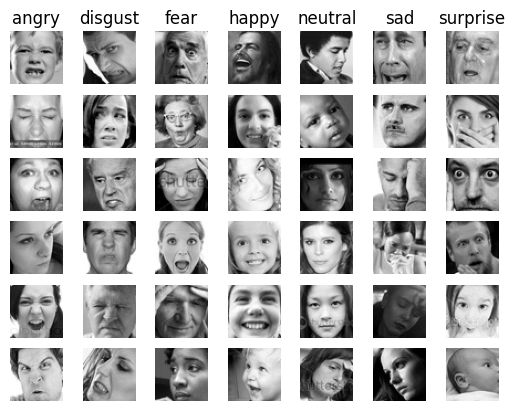

In [12]:
# Visualize some examples from the dataset
# Show a few exapmles of training images from each class
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
num_classes = len(classes)
samples_per_class = 6
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == cls)
    if len(idxs) > 0:
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(np.reshape(X_train[idx], (48, 48)), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(cls)
plt.show()

In [13]:
# instance of kNN for the whole dataset
knn = KNN(3)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Dokładność:", accuracy)

In [ ]:
validation_dir = "C:/Users/zuzia/Desktop/Coding/Python/semestr IV/Systemy Sztucznej Inteligencji/projekt/archive/images/validation"

In [ ]:
val_sub_folders = os.listdir(validation_dir)

In [ ]:
val_images = []
val_labels = []

In [ ]:
for sub_folder in val_sub_folders:
    label = sub_folder
    path = os.path.join(validation_dir, sub_folder)
    sub_folder_images = os.listdir(path)
    for image_name in sub_folder_images:
        image_path = os.path.join(path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        val_images.append(img)
        val_labels.append(label)

In [ ]:
val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [ ]:
random.seed(42)

In [ ]:
selected_images = []
selected_labels = []

In [ ]:
for label in set(val_labels):
    indices = np.where(val_labels == label)[0]
    random_index = random.choice(indices)
    selected_images.append(preprocessing(val_images[random_index]))
    selected_labels.append(label)

In [ ]:
selected_images = np.array(selected_images)

In [ ]:
predicted_labels = knn.predict(selected_images)

In [ ]:
fig, axes = plt.subplots(1, len(selected_images), figsize=(20, 5))
for i, (img, actual, predicted) in enumerate(zip(selected_images, selected_labels, predicted_labels)):
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f"Actual: {actual}\nPredicted: {predicted}")

plt.show()